In [3]:
import pandas as pd

file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Exploration

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Identify unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values in '{column}' column:")
    print(data[column].unique())

# Step 2: Handling Missing Values

# Define numerical and categorical features
numerical_features = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance', 'Nacionality', 
                        'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation']

# Justification:
# - **Numerical Features**: For numerical columns with missing values, we use mean imputation.
#   This is because the mean is suitable for continuous data and helps maintain the average values in the data.
# - **Categorical Features**: For categorical columns with missing values, we use mode imputation (most frequent value).
#   The mode is appropriate for categorical data, as it fills missing values with the most common category, preserving class distribution.

# Imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Applying imputations
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

# Verify that there are no missing values after imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())


First few rows of the dataset:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load the dataset
file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

# Separate the features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Define numerical and categorical features
numerical_features = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance', 'Nacionality', 
                        'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation']

# Imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Standardization of Numerical Features
scaler = StandardScaler()

# Encoding Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Constructing preprocessing pipelines for both numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', numerical_imputer),
    ('scaler', scaler)
])

categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', encoder)
])

# Combining both numerical and categorical transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Apply preprocessing to transform the features
X_processed = preprocessor.fit_transform(X)

# Retrieve feature names and create a DataFrame with processed data
encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
numerical_feature_names = numerical_features
processed_columns = list(numerical_feature_names) + list(encoded_feature_names)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns, index=X.index)

# Display the first few rows of the preprocessed data
X_processed_df.head()


,Unemployment rate,Inflation rate,GDP,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,...,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Mother's occupation_32
0,-0.287638,0.124386,0.765761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.876222,-1.105222,0.347199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.287638,0.124386,0.765761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.813253,-1.466871,-1.375511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.876222,-1.105222,0.347199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Correlation Analysis and Removal of Highly Correlated Features
correlation_matrix = X_processed_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
X_reduced = X_processed_df.drop(columns=high_correlation_features)

# Step 2: Dimensionality Reduction with PCA (retain 80% of variance)
pca = PCA(n_components=10)  # Set n_components to 0.80 to retain 80% of the variance
X_final = pca.fit_transform(X_reduced)

# Creating final DataFrame with reduced features
X_final_df = pd.DataFrame(X_final, columns=[f'PC{i+1}' for i in range(X_final.shape[1])])

# Calculate and print cumulative explained variance to confirm the threshold
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.78) + 1
print(f"Number of components explaining 78% of the variance: {n_components}")
print(f"Cumulative explained variance with selected components: {cumulative_variance[-1]:.2f}")

# Display the first few rows of the selected features
X_final_df.head()


Number of components explaining 78% of the variance: 10
Cumulative explained variance with selected components: 0.78


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.740542,0.102138,0.503600,-0.537632,0.305505,-0.300712,0.941772,0.147282,-0.648220,0.111194
1,-0.116839,-1.406079,0.560033,-0.205921,-0.446932,-0.122055,-0.279380,-0.222197,-0.301699,-0.280833
2,0.686982,0.242321,0.093291,1.217093,0.026888,-0.196304,0.200122,-0.380175,0.194434,-0.240840
3,-0.168552,-0.985692,-1.913704,-0.419828,-0.087562,-0.864111,0.809564,-0.203170,-0.310294,0.861004
4,-0.183627,-1.262800,0.199095,1.359373,-0.034420,0.140589,-0.760167,0.917915,0.140773,0.356961


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Separate the features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Define numerical and categorical features
numerical_features = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance', 'Nacionality', 
                        'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation']

# Imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Standardization of Numerical Features
scaler = StandardScaler()

# Encoding Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Constructing preprocessing pipelines for both numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', numerical_imputer),
    ('scaler', scaler)
])

categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', encoder)
])

# Combining both numerical and categorical transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Applying preprocessing
X_processed = preprocessor.fit_transform(X)

# Retrieve feature names and convert to DataFrame
encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
processed_columns = list(numerical_features) + list(encoded_feature_names)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns, index=X.index)

# Correlation Analysis and Removal of Highly Correlated Features
correlation_matrix = X_processed_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
X_reduced = X_processed_df.drop(columns=high_correlation_features)

# Dimensionality Reduction with PCA (retain 80% of variance)
pca = PCA(n_components=10)  # Set n_components to 0.80 to retain 80% of the variance
X_final = pca.fit_transform(X_reduced)

# Confirming the cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.78) + 1
print(f"Cumulative explained variance with selected components: {cumulative_variance[-1]:.2f}")
print(f"Number of components retained to reach 80% variance: {len(cumulative_variance)}")

# Creating final DataFrame with reduced features
X_final_df = pd.DataFrame(X_final, columns=[f'PC{i+1}' for i in range(X_final.shape[1])])

# Encode the target variable (label encoding)
y = pd.Series(pd.factorize(y)[0])  # 0 for one class, 1 for the other

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_df, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Display final model accuracies
model_accuracies


Cumulative explained variance with selected components: 0.78
Number of components retained to reach 80% variance: 10
Decision Tree Accuracy: 0.4520
              precision    recall  f1-score   support

           0       0.44      0.43      0.43       316
           1       0.53      0.59      0.56       418
           2       0.16      0.12      0.14       151

    accuracy                           0.45       885
   macro avg       0.38      0.38      0.38       885
weighted avg       0.43      0.45      0.44       885

------------------------------------------------------------
Random Forest Accuracy: 0.4836
              precision    recall  f1-score   support

           0       0.48      0.41      0.44       316
           1       0.53      0.69      0.60       418
           2       0.16      0.09      0.11       151

    accuracy                           0.48       885
   macro avg       0.39      0.39      0.38       885
weighted avg       0.45      0.48      0.46       885

{'Decision Tree': 0.4519774011299435,
 'Random Forest': 0.48361581920903957,
 'SVM (RBF Kernel)': 0.5288135593220339,
 'Neural Network': 0.5096045197740113,
 'Naive Bayes': 0.5265536723163842}

In [12]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Re-splitting the data to ensure it's consistent with previous steps
X_train, X_test, y_train, y_test = train_test_split(X_final_df, y, test_size=0.2, random_state=42)

# 1. Bagging with Random Forest
# Initialize the Random Forest model (Bagging)
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
bagging_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_bagging = bagging_model.predict(X_test)

# Calculate accuracy and classification report for Random Forest (Bagging)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging (Random Forest) Accuracy:", bagging_accuracy)
print(classification_report(y_test, y_pred_bagging))
print("-" * 60)

# 2. Boosting with Gradient Boosting
# Initialize the Gradient Boosting model
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting model
boosting_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting
y_pred_boosting = boosting_model.predict(X_test)

# Calculate accuracy and classification report for Gradient Boosting
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
print("Boosting (Gradient Boosting) Accuracy:", boosting_accuracy)
print(classification_report(y_test, y_pred_boosting))
print("-" * 60)

# Summary of accuracies
{"Bagging (Random Forest)": bagging_accuracy, "Boosting (Gradient Boosting)": boosting_accuracy}


Bagging (Random Forest) Accuracy: 0.4937853107344633
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       316
           1       0.53      0.71      0.61       418
           2       0.16      0.09      0.11       151

    accuracy                           0.49       885
   macro avg       0.40      0.40      0.39       885
weighted avg       0.46      0.49      0.47       885

------------------------------------------------------------
Boosting (Gradient Boosting) Accuracy: 0.5005649717514125
              precision    recall  f1-score   support

           0       0.54      0.30      0.39       316
           1       0.51      0.83      0.63       418
           2       0.00      0.00      0.00       151

    accuracy                           0.50       885
   macro avg       0.35      0.38      0.34       885
weighted avg       0.43      0.50      0.44       885

------------------------------------------------------------


{'Bagging (Random Forest)': 0.4937853107344633,
 'Boosting (Gradient Boosting)': 0.5005649717514125}

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
              age        Medu        Fedu  traveltime   studytime    failures  \
count  

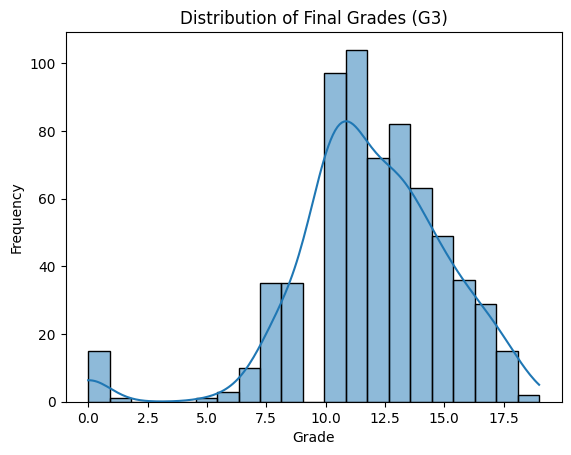

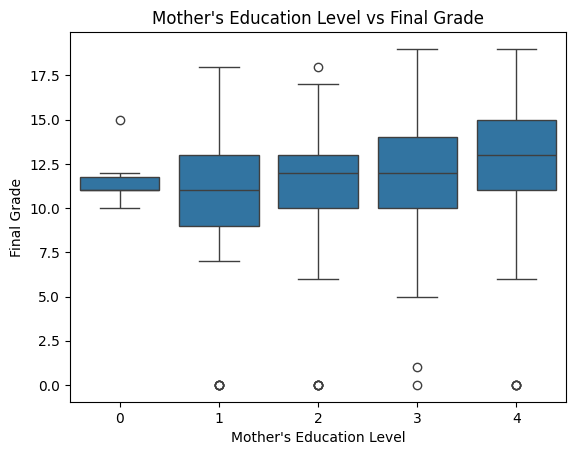

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5593 - loss: 0.7176 - val_accuracy: 0.8558 - val_loss: 0.4250
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.4138 - val_accuracy: 0.8654 - val_loss: 0.3371
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.3778 - val_accuracy: 0.8942 - val_loss: 0.2990
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.2869 - val_accuracy: 0.8942 - val_loss: 0.2786
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.2704 - val_accuracy: 0.8942 - val_loss: 0.2662
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9036 - loss: 0.2275 - val_accuracy: 0.8942 - val_loss: 0.2577
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9110 - loss: 0.1941 - val_accuracy: 0.8942 - val_loss: 0.2517
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.1853 - val_accuracy: 0.8942 - val_loss

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Load and Explore the Larger Dataset (Student Performance Dataset)
student_performance_df = pd.read_csv("../../data/student-graduation/student-por.csv", sep=';')

# Display first few rows
print(student_performance_df.head())

# Basic summary statistics
print(student_performance_df.describe())
print(student_performance_df.info())

# Step 2: Data Visualization
# Visualize the distribution of final grades (G3), which can be used as a proxy for success
sns.histplot(student_performance_df['G3'], kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

# Visualize relationships between parental education and final grades
sns.boxplot(x='Medu', y='G3', data=student_performance_df)
plt.title("Mother's Education Level vs Final Grade")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade")
plt.show()

# Step 3: Preprocess the Student Performance Dataset
# Select features relevant to academic performance and demographics
features = student_performance_df.drop(columns=['G3'])  # 'G3' is the target for this dataset
target = student_performance_df['G3']  # Final grade as target

# Encode categorical variables
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(exclude=['object']).columns

# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Preprocess features
X_performance = preprocessor.fit_transform(features)
y_performance = target.apply(lambda x: 1 if x >= 10 else 0)  # Binary classification: passing grade >= 10

# Train-test split
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

# Step 4: Train a Neural Network on the Larger Dataset
# Define a simple neural network model
input_shape_performance = X_train_perf.shape[1]  # Input shape for Student Performance dataset
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape_performance,)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification (pass/fail)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_perf, y_train_perf, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
performance_results = model.evaluate(X_test_perf, y_test_perf)
print(f"Performance Dataset Test Accuracy: {performance_results[1]:.4f}")

# Step 5: Fine-tune the Model on the Student Graduation Dataset
# Load the Student Graduation Dataset
graduation_df = pd.read_csv("../../data/student-graduation/graduation_dataset.csv")

# Preprocess the Student Graduation Dataset
X_grad = graduation_df.drop(columns=['Target'])
y_grad = graduation_df['Target']

# Encode categorical variables
categorical_features_grad = X_grad.select_dtypes(include=['object']).columns
numerical_features_grad = X_grad.select_dtypes(exclude=['object']).columns

preprocessor_grad = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_grad),
        ('cat', OneHotEncoder(drop='first'), categorical_features_grad)
    ]
)

X_grad_processed = preprocessor_grad.fit_transform(X_grad)
y_grad_encoded = LabelEncoder().fit_transform(y_grad)

# Split the Graduation dataset for fine-tuning
X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(X_grad_processed, y_grad_encoded, test_size=0.2, random_state=42)

# Step 6: Adjust Model Input Layer for Fine-tuning on New Dataset
# Get the input shape for the Student Graduation dataset
input_shape_grad = X_train_grad.shape[1]

# Redefine the model with the new input shape for transfer learning
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape_grad,)),  # Adjust input shape for new dataset
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Adjust output layer for three classes
])

# Compile the model with adjusted input and output layers
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on the Student Graduation Dataset
model.fit(X_train_grad, y_train_grad, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the fine-tuned model on the Graduation dataset
graduation_results = model.evaluate(X_test_grad, y_test_grad)
print(f"Graduation Dataset Test Accuracy (Fine-tuned): {graduation_results[1]:.4f}")

# Step 7: Summary of Transfer Learning Results
print(f"Performance Dataset Test Accuracy (Initial): {performance_results[1]:.4f}")
print(f"Graduation Dataset Test Accuracy (Fine-tuned): {graduation_results[1]:.4f}")
